In [1]:
%matplotlib inline
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import elk
from elk.ensemble import EnsembleLC
import elk.utils as u
import lightkurve as lk

print("it works!")

it works!


In [2]:
a = EnsembleLC(output_path="background tests",
               identifier='NGC 821',
               location='32.08807, 10.994953',
               radius=.0398,
               cutout_size=40,
               just_one_lc=True,
               verbose=True)
a.create_output_table()

  Would you like me to create it for you? (If not then no files will be saved) [Y/n] y


  Would you like me to create it for you? (If not then these files will not be saved) [Y/n] y


  Would you like me to create it for you? (If not then these files will not be saved) [Y/n] y


NGC 821 has 2 observations
Starting Quality Tests for Observation: 0


100%|█| 1600/1600 [05:20<00:00,  4.9


  Passed Quality Tests 
Found a lightcurve that passed quality tests - exiting since `self.just_one_lc=True`


In [4]:
(a.lcs[0].quality_tpfs - a.lcs[0].full_model_normalized).animate(vmin=-10, vmax=10, cmap='coolwarm')

In [ ]:
tpf = (a.lcs[0].quality_tpfs - a.lcs[0].full_model_normalized).flux

with open(r'background tests/NGC 821 snapshot.txt', 'w') as fp:
    for timestep in tpf:
        fp.write("%s\n" % timestep)

    

In [6]:
tm = a.lcs[0].tpfs.create_threshold_mask(9)
a.lcs[0].star_mask = tm
a.lcs[0]._uncorrected_lc = a.lcs[0].quality_tpfs.to_lightcurve(aperture_mask=tm)

In [10]:
#bq.lcs[0].tpfs.to_fits(path='NGC 4395 tpf sec22.fits', overwrite=True)
hdu = tpf0.to_fits()

In [10]:
file_path = r'elk quaver/NGC 4395 tpf sec22.fits'

with open(file_path, 'rb') as fp:
    data = fp.read()
    print(len(data))

62533440


In [22]:
file_path = 'elk quaver/NGC 4395 tpf sec22.fits'
tpf = lk.TessTargetPixelFile(file_path)
flux_data = tpf.flux[300]
print(flux_data)

[[  99.40034   104.20197   105.14995  ...   95.95693    93.97804
    94.47755 ]
 [ 103.776436  107.0333    100.35507  ...   98.64087    95.46996
    95.80809 ]
 [ 119.10176   112.781044  103.27909  ...  100.25265    96.35278
    99.25359 ]
 ...
 [  96.1406     95.01536    95.13798  ...  106.583466  115.98183
   122.682556]
 [  94.481224   94.67914    94.42028  ...  150.2835    276.27127
   327.3912  ]
 [  94.26725    94.10542    94.14662  ...  541.2345   2259.2092
  1388.7618  ]] electron / s


In [28]:
print(flux_data[6])

[5660.427    1067.6182    223.72333   133.09209   105.34206    98.68877
   99.41294   101.29002   111.68245   122.36511   107.01436    97.78934
   97.50214    97.09571    97.58344    97.33615    97.09605    97.74516
   96.9712     97.86276    97.52927    97.4751     97.82286    97.27719
   97.694954   96.73141    96.88191    98.16193    98.64535    98.695496
   98.13594    98.15043    99.55181    99.34214    99.40568    98.4755
   97.33781    97.77013    98.270935   97.7055     97.58003    97.51139
   99.16061   110.5912    136.80495   116.73747   106.05801   105.727295
  100.42374    97.70822 ] electron / s


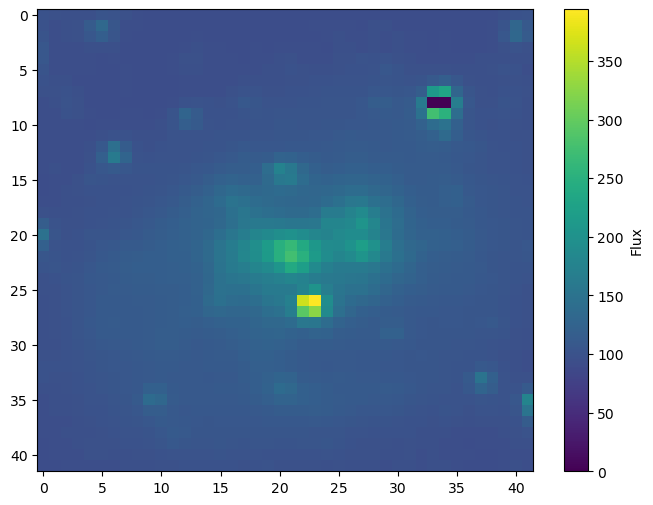

[[ 99.548645  97.085594  96.00621  ...  95.716156  99.99194  101.154686]
 [ 99.81339   95.16238   96.47345  ... 103.07427  129.61151  110.039925]
 [101.90502   94.530945  95.5126   ... 106.25544  131.14308  113.52971 ]
 ...
 [ 93.54425   94.928276  95.15274  ...  94.46664   95.59382   96.26722 ]
 [ 93.73584   94.07314   94.558586 ...  94.3684    94.99661   94.57618 ]
 [ 93.74623   93.75528   94.093025 ...  95.064186  95.566925  94.3213  ]] electron / s


In [38]:
flux_data = tpf.flux[1200]
clipped_data = flux_data[4:-4, 4:-4]
clipped_data[8][33] = 0
clipped_data[8][34] = 0

plt.figure(figsize=(8, 6))
plt.imshow(clipped_data, cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar(label='Flux')
plt.show()
print(clipped_data)

In [48]:
lk.search_targetpixelfile("3C 273",mission='TESS')

SearchResult containing 3 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 46 2021      SPOC      20   377297839      0.0
  1 TESS Sector 46 2021      SPOC     120   377297839      0.0
  2 TESS Sector 46 2021 TESS-SPOC     600   377297839      0.0